# Understanding Descriptive Statistics

Import the necessary libraries here:

In [240]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from random import randint


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [241]:
# your code here
def rolling_dice():
    n = 1
    results=[]
    while n < 11:
        results.append(randint(1,6))
        n+=1
    return pd.DataFrame({"values" : results}).sort_values(by='values')
    
results_df=rolling_dice()






#### 2.- Plot the results sorted by value.

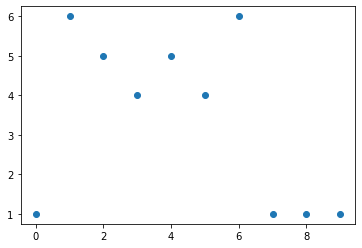

In [242]:
# your code here

#results_df
plt.scatter(results_df.index,results_df.values)

#results_df

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<BarContainer object of 4 artists>

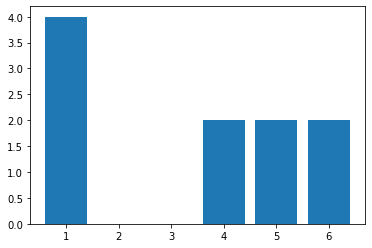

In [243]:
# your code here
results_group=results_df.groupby('values')['values'].count()

plt.bar(results_group.index,results_group.values)




In [244]:
"""
the frequency distribution is showing the values on the X axis and the count of the values on the Y axis. 
The other one is discribing the values returned for each roll of dize (x axis)
"""



'\nthe frequency distribution is showing the values on the X axis and the count of the values on the Y axis. \nThe other one is discribing the values returned for each roll of dize (x axis)\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [245]:
# your code here
def mean_function(list_dices):
        sum_ = sum(list_dices)
        return float(sum_/len(list_dices))

mean_function(results_df.values) 


3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [246]:
# your code here


def mean_function_df(df):
    result = [x*y for x, y in zip(df.index, df.values)]
    sum_result=sum(result)
    return sum_result/sum(df.values)

mean_function_df(results_group)



3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [247]:
# your code here

def median_function(df):
    if len(df)%2==0:
        median_1=df.iloc[int((len(results_df)/2)),:]
        median_2=df.iloc[int((len(results_df)/2)-1),:]
        median=(median_1+median_2)/2
    else:
        median = df.iloc[int((len(results_df)/2)-0.5),:]
    return median


median_function(results_df)




values    4.0
dtype: float64

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [248]:
# your code here

results_df=results_df.sort_values(by='values')
list_index=[0,1,2,3,4,5,6,7,8,9]
results_df['new_index']=list_index
results_df=results_df.set_index('new_index')

def quartiles_df(df):
    
    
    if len(df)%2==0:
        q1 = df.iloc[int((len(df)*0.25)),:]
        median_1=df.iloc[int((len(df)*0.5)),:]
        median_2=df.iloc[int((len(df)*0.5)-1*(len(df)/10)),:]
        median=(median_1+median_2)/2
        q3 = df.iloc[int((len(df)*0.75)),:]
        
    else:
        q1_1=df.iloc[int((len(df)*0.25)-1),:]
        q1_2=df.iloc[int((len(df)*0.25)),:]
        q1=(q1_1+q1_2)/2
        
        median = df.iloc[int((len(df)/2)-0.5*(len(df)/10)),:]
        
        q3_1=df.iloc[int((len(df)*0.75)-1),:]
        q3_2=df.iloc[int((len(df)*0.75)),:]
        q3=(q3_1+q3_2)/2
    
    return q1, median, q3

quartiles_df(results_df)



print("Q1 = ",float(quartiles_df(results_df)[0].values),', median =', float(quartiles_df(results_df)[1].values), ", Q3 =", float(quartiles_df(results_df)[2].values) )


Q1 =  1.0 , median = 4.0 , Q3 = 5.0


In [249]:
results_df

,values
new_index,
0,1
1,1
2,1
3,1
4,4
5,4
6,5
7,5
8,6


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [260]:
# your code here

data= pd.read_csv('/Users/guillaumeaubert/Documents/Ironhack/Module2/Week2/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')


data=data.sort_values(by='value')
data

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [261]:
# your code here

mean_function(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [263]:
# your code here
data_hist=data.groupby('value')['value'].count()
data_hist

value
1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<function matplotlib.pyplot.show(*args, **kw)>

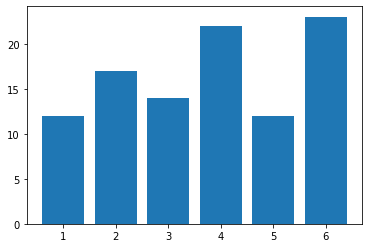

In [264]:
# your code here


plt.bar(data_hist.index,data_hist.values)
plt.show


In [ ]:
"""
The mean is in between 3 & 4 bar: 3.74
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

3.447

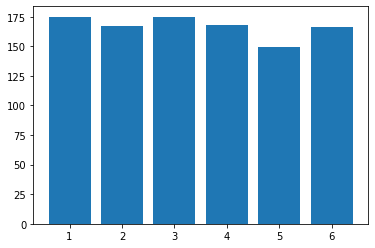

In [269]:
# your code here
data= pd.read_csv('/Users/guillaumeaubert/Documents/Ironhack/Module2/Week2/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')

data=data.sort_values(by='value')

data_hist=data.groupby('value')['value'].count()
plt.bar(data_hist.index,data_hist.values)

mean_function(data['value'])


In [ ]:
"""
Each value of the dice tends to have the same distribution because we increased the number of rolling dice 
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

<BarContainer object of 72 artists>

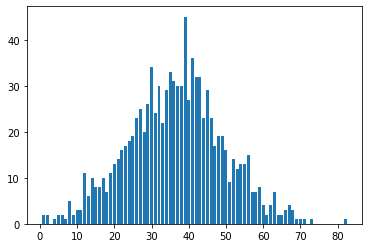

In [276]:
# your code here

data=pd.read_csv('/Users/guillaumeaubert/Documents/Ironhack/Module2/Week2/lab-understanding-descriptive-stats/data/ages_population.csv')

data_hist=data.groupby('observation')['observation'].count()
plt.bar(data_hist.index,data_hist.values)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [277]:
# your code here
mean=data['observation'].mean()
std=data['observation'].std()
print(mean , std)

36.56 12.816499625976762


In [ ]:
"""
 Almost ;)
 """

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<BarContainer object of 18 artists>

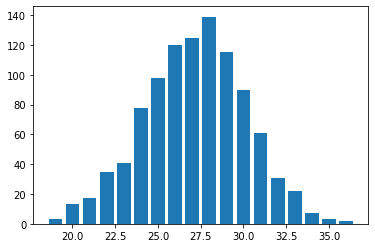

In [278]:
# your code here

data=pd.read_csv('/Users/guillaumeaubert/Documents/Ironhack/Module2/Week2/lab-understanding-descriptive-stats/data/ages_population2.csv')

data_hist=data.groupby('observation')['observation'].count()
plt.bar(data_hist.index,data_hist.values)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes, the mid is now around 28, while it was around 38 on step 1. The distribution shifted to the left of the graph """

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [279]:
# your code here
mean=data['observation'].mean()
std=data['observation'].std()
print(mean , std)

27.155 2.969813932689186


In [ ]:
"""
The mean is now 27.155. Also the std is smaller, so it means that the datas are less dispersed"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<BarContainer object of 75 artists>

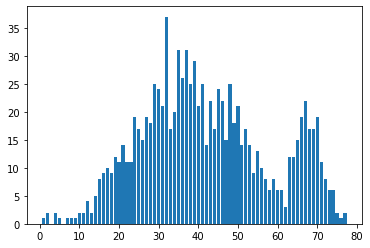

In [288]:
# your code here

data=pd.read_csv('/Users/guillaumeaubert/Documents/Ironhack/Module2/Week2/lab-understanding-descriptive-stats/data/ages_population3.csv')

data_hist=data.groupby('observation')['observation'].count()
plt.bar(data_hist.index,data_hist.values)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [281]:
# your code here
mean=data['observation'].mean()
std=data['observation'].std()
print(mean , std)

#the mean is now 41.99 and the std is 16. It means the values are sprend. 
# Also we cans see on the histogram that there are values around 70, that will affect the mean

41.989 16.144705959865934


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [297]:
# your code here

q1=data.quantile(q=0.25)
median=data.quantile(q=0.5)
q3=data.quantile(q=0.75)
mean=data.mean()

print(q1,median,q3,mean)


observation    30.0
Name: 0.25, dtype: float64 observation    40.0
Name: 0.5, dtype: float64 observation    53.0
Name: 0.75, dtype: float64 observation    41.989
dtype: float64


In [294]:
#There is a difference of 13 (40 vs 53). The mean is being affected by the extrem right and left values

(observation    30.0
 Name: 250, dtype: float64,
 observation    38.0
 dtype: float64,
 observation    53.0
 Name: 750, dtype: float64)

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [301]:
# your code here

q9=data.quantile(q=0.9)
q8 = data.quantile(q=0.8)
#median=data.quantile(q=0.5)
#q3=data.quantile(q=0.75)
#mean=data.mean()
q9

observation    67.0
Name: 0.9, dtype: float64

In [ ]:
"""
There are 10% of people that are 67 or over.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""